In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
games = pd.read_csv("games.csv", index_col=0)
pd.set_option("display.max_rows", 10)

In [4]:
games['created_at'] = pd.to_datetime(games['created_at'], unit='ms')
games['last_move_at'] = pd.to_datetime(games['last_move_at'], unit='ms')

In [5]:
games.head(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
id,,,,,,,,,,,,,,,
TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [6]:
games['duration'] = games['last_move_at'] - games['created_at']
games['duration'].describe()

count                        20058
mean     0 days 00:14:29.707049606
std      0 days 01:20:14.222090938
min                0 days 00:00:00
25%                0 days 00:00:00
50%         0 days 00:04:00.612000
75%         0 days 00:13:13.171250
max         7 days 00:17:24.701000
Name: duration, dtype: object

In [7]:
games['year'] = games['created_at'].dt.year
games.groupby('year')['duration'].mean()

year
2013   0 days 00:15:03.273018867
2014   0 days 00:19:59.018324921
2015   0 days 00:14:49.770403395
2016   0 days 00:16:31.689600055
2017   0 days 00:13:25.785714893
Name: duration, dtype: timedelta64[ns]

In [8]:
games['created_at'] = pd.to_datetime(games['created_at'], unit='ms')
games['last_move_at'] = pd.to_datetime(games['last_move_at'], unit='ms')

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20058 entries, TZJHLljE to N8G2JHGG
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   rated           20058 non-null  bool           
 1   created_at      20058 non-null  datetime64[ns] 
 2   last_move_at    20058 non-null  datetime64[ns] 
 3   turns           20058 non-null  int64          
 4   victory_status  20058 non-null  object         
 5   winner          20058 non-null  object         
 6   increment_code  20058 non-null  object         
 7   white_id        20058 non-null  object         
 8   white_rating    20058 non-null  int64          
 9   black_id        20058 non-null  object         
 10  black_rating    20058 non-null  int64          
 11  moves           20058 non-null  object         
 12  opening_eco     20058 non-null  object         
 13  opening_name    20058 non-null  object         
 14  opening_ply     20058 non-null  i

In [10]:
games.shape

(20058, 17)

In [11]:
games.head(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration,year
id,,,,,,,,,,,,,,,,,
TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0 days,2017
l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0 days,2017
mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0 days,2017


In [12]:
games.tail(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration,year
id,,,,,,,,,,,,,,,,,
yrAas0Kj,True,2017-07-10 14:44:37.493,2017-07-10 14:47:30.327,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,0 days 00:02:52.834000,2017
b0v4tRyF,True,2017-07-10 14:15:27.019,2017-07-10 14:31:13.718,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,0 days 00:15:46.699000,2017
N8G2JHGG,True,2017-07-09 23:32:32.649,2017-07-09 23:44:49.348,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3,0 days 00:12:16.699000,2017


In [13]:
games.isnull().sum()

rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
                 ..
opening_eco       0
opening_name      0
opening_ply       0
duration          0
year              0
Length: 17, dtype: int64

In [14]:
games.duplicated().sum()

np.int64(429)

In [15]:
games.drop_duplicates(inplace=True)

In [16]:
games.duplicated().sum()

np.int64(0)

In [17]:
top_openings = games["opening_name"].value_counts()
top_openings

opening_name
Van't Kruijs Opening                                                    363
Sicilian Defense                                                        353
Sicilian Defense: Bowdler Attack                                        294
French Defense: Knight Variation                                        265
Scotch Game                                                             264
                                                                       ... 
Queen's Gambit Refused: Baltic Defense |  Queen Attack                    1
Polish Opening: King's Indian Variation |  Schiffler Attack               1
Queen's Gambit Declined: Semi-Tarrasch Defense |  Exchange Variation      1
Sicilian Defense: Spielmann Variation                                     1
King's Indian Defense: Orthodox Variation |  Glek Defense                 1
Name: count, Length: 1477, dtype: int64

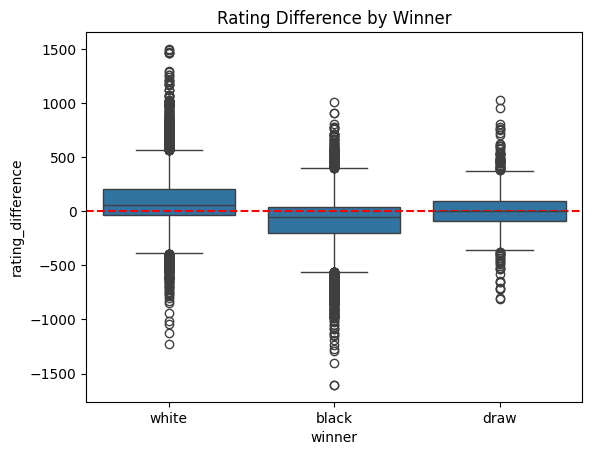

In [18]:
games["rating_difference"] = (games["white_rating"] - games["black_rating"])

sns.boxplot(x='winner', y='rating_difference', data=games)
plt.title('Rating Difference by Winner')
plt.axhline(0, color='red', linestyle='--')
plt.show()

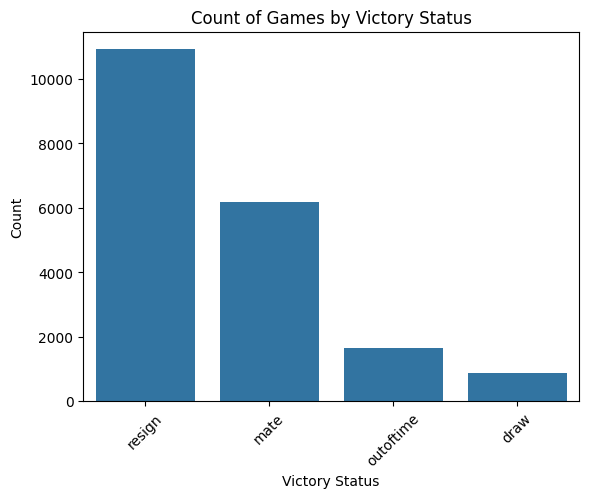

In [19]:
status_counts = games['victory_status'].value_counts()

sns.countplot(x="victory_status", data=games, order=status_counts.index)
plt.xlabel("Victory Status")
plt.ylabel("Count")
plt.title("Count of Games by Victory Status")
plt.xticks(rotation=45)
plt.show()

In [20]:
win_count = games.winner.value_counts()
print(win_count)

winner
white    9792
black    8919
draw      918
Name: count, dtype: int64


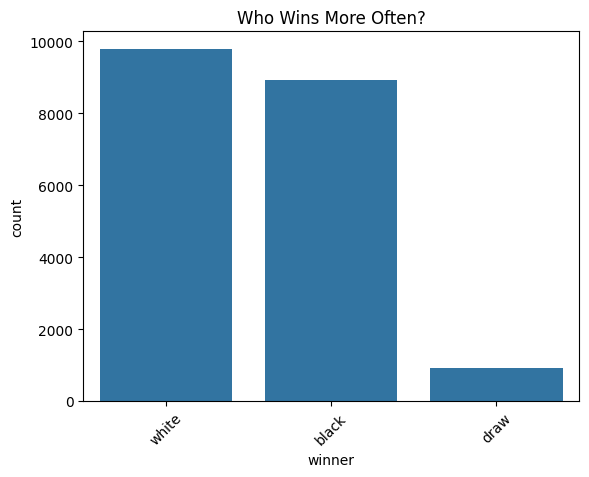

In [21]:
sns.countplot(x='winner', data=games, order=win_count.index)
plt.title('Who Wins More Often?')
plt.xticks(rotation=45)
plt.show()

In [22]:
games["duration_seconds"] = (games["last_move_at"] - games["created_at"]).dt.total_seconds()
games["duration_minutes"] = games["duration_seconds"] / 60

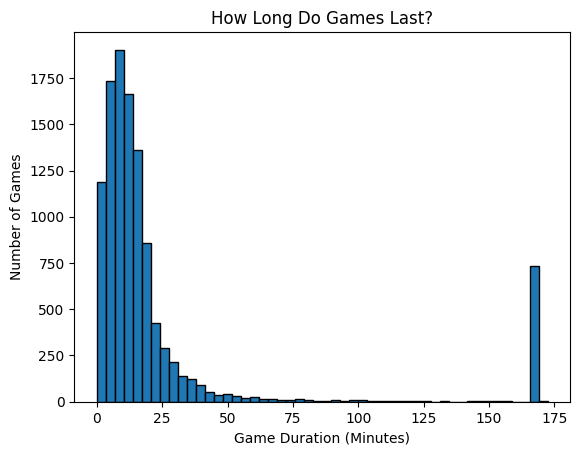

Average game: 14.5 minutes


In [23]:
clean_games = games[(games['duration_minutes'] > 0) & (games['duration_minutes'] < 180)]

plt.hist(clean_games['duration_minutes'], bins=50, edgecolor='black')
plt.xlabel('Game Duration (Minutes)')
plt.ylabel('Number of Games')
plt.title('How Long Do Games Last?')
plt.show()

print(f"Average game: {games['duration_minutes'].mean():.1f} minutes")

In [24]:
games.sort_values(by="turns")

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration,year,rating_difference,duration_seconds,duration_minutes
id,,,,,,,,,,,,,,,,,,,,
458qPV3q,False,2017-08-23 18:47:09.547,2017-08-23 18:47:21.125,1,resign,white,10+25,lance5500,2621,antons,1614,d4,A40,Queen's Pawn,1,0 days 00:00:11.578000,2017,1007,11.578,0.192967
cbsKbsCn,False,2016-06-08 01:40:00.000,2016-06-08 01:40:00.000,1,outoftime,white,5+15,slowgamer,2100,ytdvvc,1404,e4,B00,King's Pawn,1,0 days 00:00:00,2016,696,0.000,0.000000
8uS7Lt5i,True,2017-09-03 00:50:03.537,2017-09-03 00:50:05.459,1,resign,black,10+0,networkchess2,1878,kaskade24,1860,d3,A00,Mieses Opening,1,0 days 00:00:01.922000,2017,18,1.922,0.032033
pgZ12eMH,False,2017-07-20 16:05:35.886,2017-07-20 16:06:06.956,1,outoftime,white,10+20,lance5500,2621,xxcrunchypebblexx,1324,d4,A40,Queen's Pawn,1,0 days 00:00:31.070000,2017,1297,31.070,0.517833
rAO6oybn,False,2016-12-04 05:40:00.000,2016-12-04 05:40:00.000,1,outoftime,white,5+5,ranchowangdu,1500,justicebot,2723,e4,B00,King's Pawn,1,0 days 00:00:00,2016,-1223,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p4a3ZFBE,True,2017-02-28 16:56:30.380,2017-02-28 17:31:32.986,222,mate,black,9+5,khelil,1617,sedik,1614,e4 d6 Bc4 f5 d3 Nf6 Bg5 fxe4 dxe4 Nxe4 Qf3 Nxg...,B07,Pirc Defense #4,2,0 days 00:35:02.606000,2017,3,2102.606,35.043433
5ZjOnwjl,True,2016-11-27 18:25:25.871,2016-11-27 18:44:20.068,226,draw,draw,10+0,chunnev,1817,jhonthoth,1907,e4 e6 Nf3 d5 exd5 exd5 d4 Nf6 Bg5 Be7 Nc3 Be6 ...,C00,French Defense: Knight Variation,3,0 days 00:18:54.197000,2016,-90,1134.197,18.903283
vQq60Hur,True,2016-09-21 17:46:40.000,2016-09-21 20:33:20.000,255,draw,draw,7+2,manipin,1585,kasparovd0311,1448,e4 e6 Nc3 d5 exd5 exd5 d4 Nf6 Bf4 Be7 Nf3 O-O ...,C00,French Defense: Queen's Knight,3,0 days 02:46:40,2016,137,10000.000,166.666667


Optimization terminated successfully.
         Current function value: 0.614955
         Iterations 5


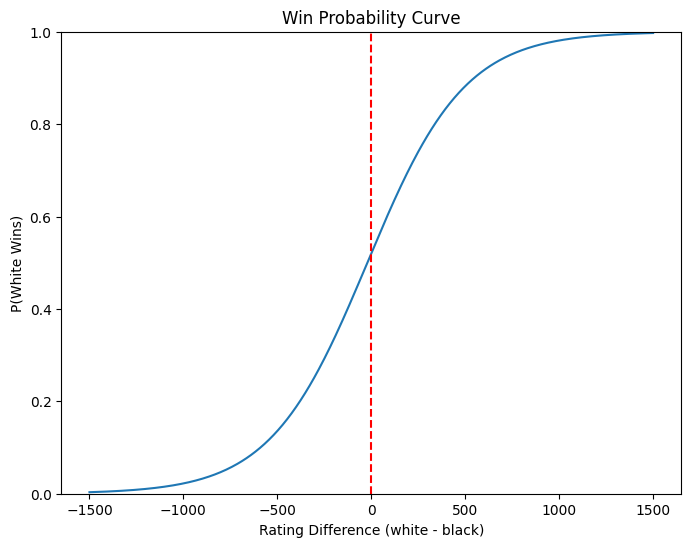

In [46]:
import statsmodels.formula.api as smf

model_data = games.copy()

model_data = model_data[model_data['winner'] != 'draw'].copy()
model_data['white_win'] = (model_data['winner'] == 'white').astype(int)
model_data['rating_diff'] = model_data['white_rating'] - model_data['black_rating']
model = smf.logit("white_win ~ rating_diff", data=model_data).fit()

x_vals = np.linspace(-1500, 1500, 500)
preds = model.predict({"rating_diff": x_vals})

plt.figure(figsize=(8,6))
sns.lineplot(x=x_vals, y=preds)

plt.axvline(0, color='red', linestyle='--')
plt.title("Win Probability Curve")
plt.xlabel("Rating Difference (white - black)")
plt.ylabel("P(White Wins)")
plt.ylim(0, 1)
plt.show()
